In [ ]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

from PIL import Image

cudnn.benchmark = True
plt.ion()   # interactive mode

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '/content/drive/MyDrive/image/for transfer learning'

image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
#                                             shuffle=True, num_workers=4)
                                             shuffle=True, num_workers=0)               
              for x in ['train', 'val']}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}

class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(dataset_sizes)
print(class_names)

{'train': 380, 'val': 310}
['no', 'yes']


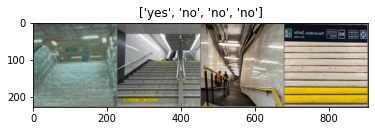

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [ ]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                print(class_names[labels[j]])
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [ ]:
#model_ft = models.resnet18(pretrained=True)
model_ft = torch.load("/content/drive/MyDrive/Colab Notebooks/소융대 학술제/model_ft (1).pth")
#model_ft = torch.load("/content/drive/MyDrive/Colab Notebooks/소융대 학술제/model_ft.pth")

num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

outputs: tensor([[-0.8771,  1.4753]], device='cuda:0', grad_fn=<AddmmBackward0>)
predicted: yes


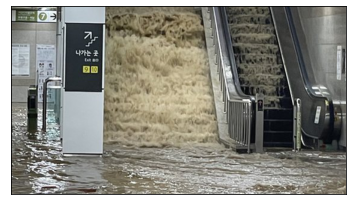

In [ ]:
test_image = '/content/drive/MyDrive/datasets/소융학술제/강남역 침수_157.jpg'

image = Image.open(test_image)

plt.imshow(image), plt.xticks([]), plt.yticks([])

image = data_transforms['val'](image).unsqueeze(0).cuda()

outputs = model_ft(image)
_, preds = torch.max(outputs, 1)

print('outputs:', outputs);

#print('preds', preds)
print('predicted: {}'.format(class_names[preds]))

outputs: tensor([[0.3294, 0.9116]], device='cuda:0', grad_fn=<AddmmBackward0>)
predicted: yes


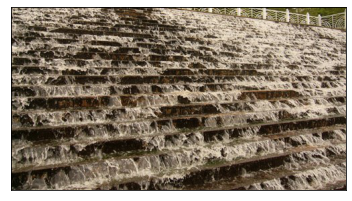

In [ ]:
test_image = '/content/drive/MyDrive/datasets/소융학술제/계단 물난리_48.jpg의 사본'

image = Image.open(test_image)

plt.imshow(image), plt.xticks([]), plt.yticks([])

image = data_transforms['val'](image).unsqueeze(0).cuda()

outputs = model_ft(image)
_, preds = torch.max(outputs, 1)

print('outputs:', outputs);

#print('preds', preds)
print('predicted: {}'.format(class_names[preds]))

outputs: tensor([[0.5108, 0.5825]], device='cuda:0', grad_fn=<AddmmBackward0>)
predicted: yes


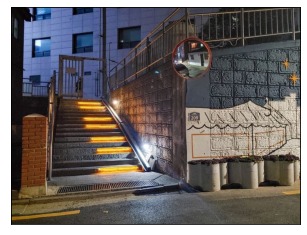

In [ ]:
test_image = '/content/drive/MyDrive/datasets/소융학술제/KakaoTalk_20221117_125053629.jpg'

image = Image.open(test_image)

plt.imshow(image), plt.xticks([]), plt.yticks([])

image = data_transforms['val'](image).unsqueeze(0).cuda()

outputs = model_ft(image)
_, preds = torch.max(outputs, 1)

print('outputs:', outputs);

#print('preds', preds)
print('predicted: {}'.format(class_names[preds]))

outputs: tensor([[0.9629, 0.1131]], device='cuda:0', grad_fn=<AddmmBackward0>)
predicted: no


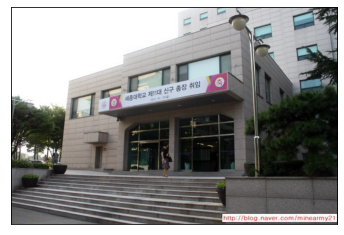

In [ ]:
test_image = '/content/drive/MyDrive/datasets/소융학술제/KakaoTalk_20221117_125309644.jpg'

image = Image.open(test_image)

plt.imshow(image), plt.xticks([]), plt.yticks([])

image = data_transforms['val'](image).unsqueeze(0).cuda()

outputs = model_ft(image)
_, preds = torch.max(outputs, 1)

print('outputs:', outputs);

#print('preds', preds)
print('predicted: {}'.format(class_names[preds]))

outputs: tensor([[ 1.0148, -0.0437]], device='cuda:0', grad_fn=<AddmmBackward0>)
predicted: no


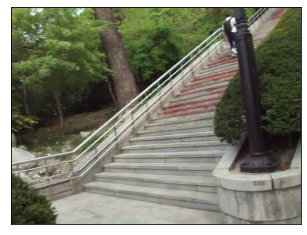

In [ ]:
test_image = '/content/drive/MyDrive/datasets/소융학술제/KakaoTalk_20221117_125854102.jpg'

image = Image.open(test_image)

plt.imshow(image), plt.xticks([]), plt.yticks([])

image = data_transforms['val'](image).unsqueeze(0).cuda()

outputs = model_ft(image)
_, preds = torch.max(outputs, 1)

print('outputs:', outputs);

#print('preds', preds)
print('predicted: {}'.format(class_names[preds]))